In [21]:
import pandas as pd
import yfinance as yf

# 예시로 애플(AAPL) 주식 데이터 불러오기
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
print(data.head())


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.152634  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.441460  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.018692  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.675270  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.844360  132079200


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152634,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018692,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400


In [17]:
# 결측치 확인
print(data.isnull().sum())

# 결측치 제거
data = data.dropna()



Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# 이동 평균과 같은 새로운 특성 생성
data['SMA_20'] = data['Close'].rolling(window=20).mean()  # 20일 이동 평균
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50일 이동 평균


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 예측을 위한 특성과 타겟 변수 정의
features = data[['Open', 'High', 'Low']]
target = data['Close']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

# 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 성능 평가
print(model.score(X_test, y_test))


0.9978579462045286


In [11]:
type(X_train)

pandas.core.frame.DataFrame

In [14]:
import pandas as pd
X_train.to_excel("test.xlsx")

Model Accuracy: 0.9979223884805658


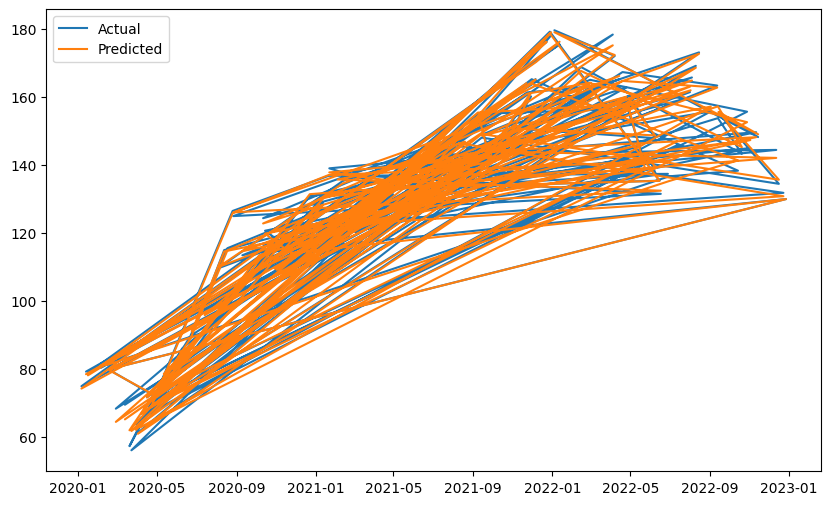

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 데이터 불러오기 (예시: 'data.csv' 파일)

# # 'Date' 열을 datetime 형식으로 변환하고 인덱스로 설정
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# 예측을 위한 특성과 타겟 변수 정의
features = data[['Open', 'High', 'Low', 'Volume']]  # 'Volume' 추가
target = data['Close']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 모델 생성 및 훈련
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print(f"Model Accuracy: {model.score(X_test, y_test)}")

# 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()
